In [1]:
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.collections import LineCollection
import levy

import brainpy.math as bm
import sys
sys.path.append('..')
import TwoD_fun

/home/zilong/anaconda3/envs/hippocampalsequence/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def downsample(center,num = 30):
    ans = np.zeros(np.floor(center.shape[0]/num).astype(int)-1)
    for i in range(ans.shape[0]):
        ans[i] = center[num*i]
    return ans


### 1, plot the phase diagram and example replay trajectories

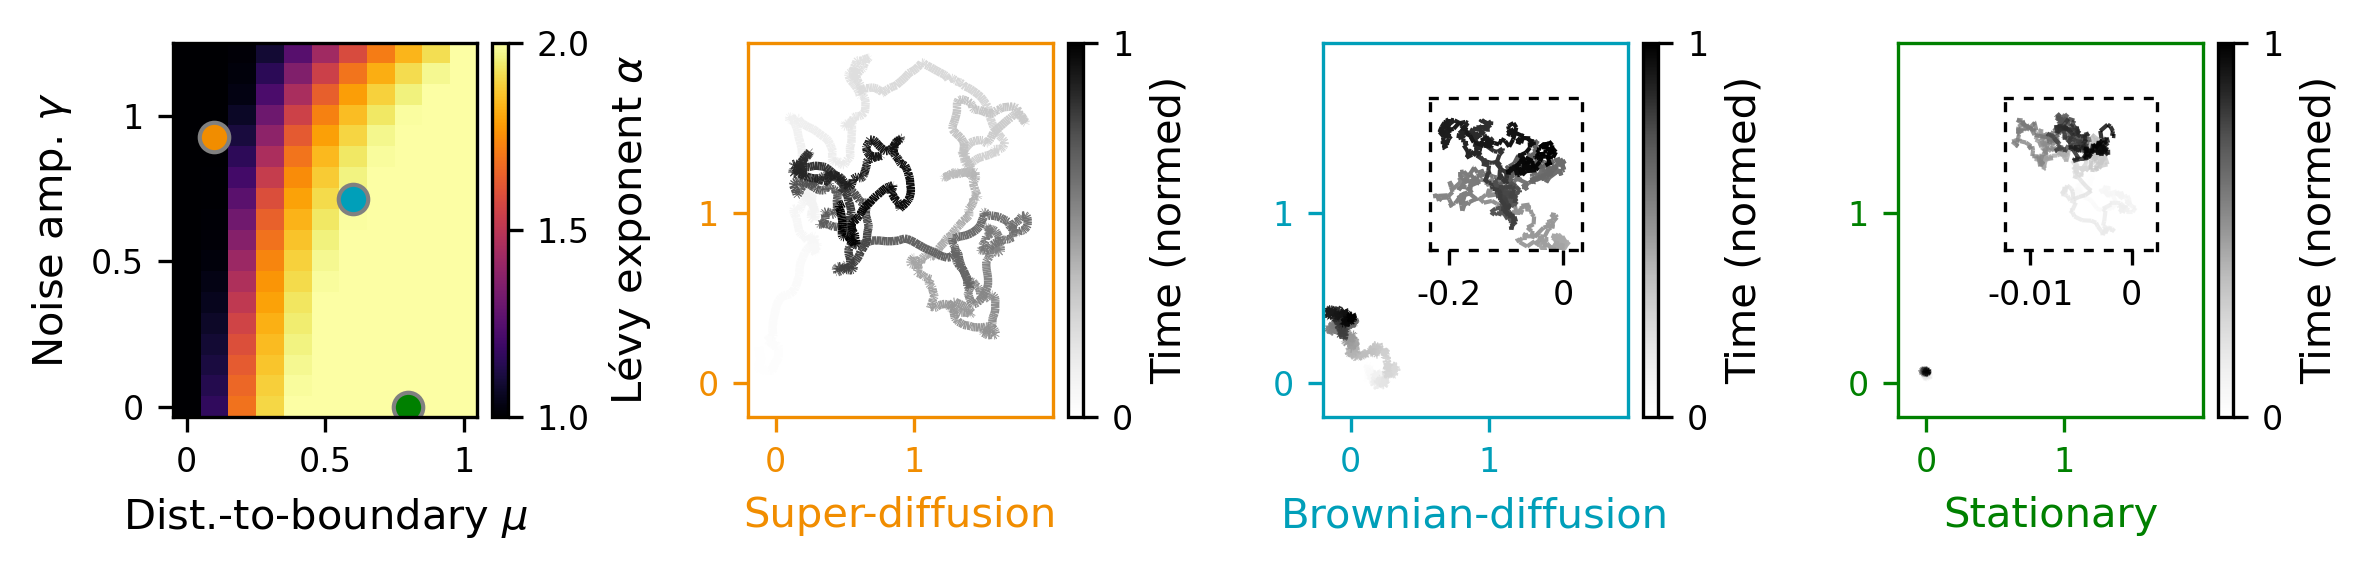

In [3]:

#if the data is not under '../data/Alpha.npy', generate it
if not os.path.exists('../data/Alpha.npy'):
    Alpha = TwoD_fun.get_Alpha(11, 21, True)
    np.save('./data/Alpha.npy', Alpha)
else:
    Alpha = np.load('../data/Alpha.npy')[0:-3,:,:]
Alpha = np.mean(Alpha, axis=2)


#init a figure with gridspec
fig = plt.figure(figsize=(8,2), dpi= 300)
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,1], height_ratios=[1])

#set font size
labelsize = 10
ticksize = 8
#color
custom_color1 = '#F18D00'
custom_color2 = '#009FB9'
#black color
custom_color3 =  '#008000'

###########
#subplot 1#
###########

#plot the phase diagram in the first subplot
ax1 = plt.subplot(gs[0])

im = ax1.imshow(Alpha, origin='lower',cmap='inferno', aspect='auto')

#add colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(im, cax=cax)
cb.set_label(r'Lévy exponent $\alpha$', fontsize=labelsize)
cb.set_ticks([1, 1.5, 2])
cb.ax.tick_params(labelsize=ticksize)

#add markers for demonstration
ax1.scatter([1],[13], marker='o', c=custom_color1, edgecolors='grey', s=50, alpha=1)
ax1.scatter([6],[10], marker='o', c=custom_color2, edgecolors='grey', s=50, alpha=1)
ax1.scatter([8],[0], marker='o', c=custom_color3, edgecolors='grey', s=50, alpha=1)

#decorate the plot
ax1.set_xticks(np.array([0,5,10]))
ax1.set_xticklabels([0,0.5,1],fontsize = ticksize)
ax1.set_yticks(np.array([0, 7, 14]))
ax1.set_yticklabels([0, 0.5, 1],fontsize = ticksize)
ax1.set_xlabel(r'Dist.-to-boundary $\mu$', fontsize = labelsize)
ax1.set_ylabel(r'Noise amp. $\gamma$', fontsize=labelsize)

###########
#subplot 2#
###########

ax2 = plt.subplot(gs[1])

mu = 0.1
gamma = 15

#if not exists './data/center_trace' + str(mu) + '_' + str(gamma) + '.npy', generate it
if not os.path.exists('../data/center_trace' + str(mu) + '_' + str(gamma) + '.npy'):
    center_trace = bm.as_numpy(TwoD_fun.get_trace(mu, gamma, 100, 0.2, 1, 1, sigma_u=0.5))
    np.save('./data/center_trace' + str(mu) + '_' + str(gamma) + '.npy', center_trace)
else:
    center_trace = np.load('../data/center_trace' + str(mu) + '_' + str(gamma) + '.npy')

x = downsample(center_trace[200:-1,0]*-1)
y = downsample(center_trace[200:-1,1]*-1 + 0.05)

dydx = np.array((range(x.shape[0]))) / x.shape[0] # first derivative

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='Greys', norm=norm, linewidth=2, alpha=1)
lc.set_array(dydx)
line = ax2.add_collection(lc)
#label color as custom_color1
ax2.set_xlabel('Super-diffusion',fontsize=labelsize, color=custom_color1)
ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])
ax2.set_xticklabels([0, 1],fontsize=ticksize)
ax2.set_yticklabels([0, 1],fontsize=ticksize)
#set ticks color to custom_color3
ax2.tick_params(axis='x', colors=custom_color1)
ax2.tick_params(axis='y', colors=custom_color1)

ax2.set_xlim(-0.2, 2)
ax2.set_ylim(-0.2, 2)

#chnage the axis color to custom_color1
ax2.spines['bottom'].set_color(custom_color1)
ax2.spines['left'].set_color(custom_color1)
ax2.spines['top'].set_color(custom_color1)
ax2.spines['right'].set_color(custom_color1)

#add colorbar to ax4 to indicate the start and end of the trajectory
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(line, cax=cax)
cb.set_label('Time (normed)', fontsize=labelsize)
cb.set_ticks([0, 1])
cb.ax.tick_params(labelsize=ticksize)
        

###########
#subplot 3#
###########
ax3 = plt.subplot(gs[2])

mu = 0.8
gamma = 0.1

#if not exists './data/center_trace' + str(mu) + '_' + str(gamma) + '.npy', generate it
if not os.path.exists('../data/center_trace' + str(mu) + '_' + str(gamma) + '.npy'):
    center_trace = bm.as_numpy(TwoD_fun.get_trace(mu, gamma, 100, 0.2, 1, 1, sigma_u=0.5))
    np.save('./data/center_trace' + str(mu) + '_' + str(gamma) + '.npy', center_trace)
else:
    center_trace = np.load('../data/center_trace' + str(mu) + '_' + str(gamma) + '.npy')

x = downsample(center_trace[200:-1,0]*-3 + 0.15)
y = downsample(center_trace[200:-1,1]*-3 + 0.05)

dydx = np.array((range(x.shape[0]))) / x.shape[0] # first derivative

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='Greys', norm=norm, linewidth=2, alpha=1)
lc.set_array(dydx)
line = ax3.add_collection(lc)
ax3.set_xlabel('Brownian-diffusion',fontsize=labelsize, color=custom_color2)
ax3.set_xticks([0, 1])
ax3.set_yticks([0, 1])
ax3.set_xticklabels([0, 1],fontsize=ticksize)
ax3.set_yticklabels([0, 1],fontsize=ticksize)
#set ticks color to custom_color3
ax3.tick_params(axis='x', colors=custom_color2)
ax3.tick_params(axis='y', colors=custom_color2)

ax3.set_xlim(-0.2, 2)
ax3.set_ylim(-0.2, 2)

#add an insert in ax3
x2 = downsample(center_trace[200:-1, 0] * -10)
y2 = downsample(center_trace[200:-1, 1] * -10)

#add sub ax to ax3
subax3 = ax3.inset_axes([0.35, 0.35, 0.5, 0.6])

#change the axes to square
subax3.set_aspect('equal')

#set subax3 4 axes to dashed lines
subax3.spines['bottom'].set_linestyle((0, (2, 4)))
subax3.spines['left'].set_linestyle((0, (2, 4)))
subax3.spines['top'].set_linestyle((0, (2, 4)))
subax3.spines['right'].set_linestyle((0, (2, 4)))

dydx = np.array((range(x2.shape[0]))) / x2.shape[0]  # first derivative

points = np.array([x2, y2]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='Greys', norm=norm, linewidth=1, alpha=1.0)
lc.set_array(dydx)
subax3.add_collection(lc)

#set the ticks in subax3
subax3.set_xticks([-1,-0.4], [-0.2, 0], fontsize=ticksize)
subax3.set_yticks([], [], fontsize=ticksize)

#set the limits in subax3
subax3.set_xlim([-1.1, -0.3])
subax3.set_ylim([0.6, 1.4])

#chnage the axis color to custom_color2
ax3.spines['bottom'].set_color(custom_color2)
ax3.spines['left'].set_color(custom_color2)
ax3.spines['top'].set_color(custom_color2)
ax3.spines['right'].set_color(custom_color2)

#add colorbar to ax4 to indicate the start and end of the trajectory
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(line, cax=cax)
cb.set_label('Time (normed)', fontsize=labelsize)
cb.set_ticks([0, 1])
cb.ax.tick_params(labelsize=ticksize)
        

###########
#subplot 4#
###########

ax4 = plt.subplot(gs[3])

mu = 0.9
gamma = 0.01

#if not exists './data/center_trace' + str(mu) + '_' + str(gamma) + '.npy', generate it
if not os.path.exists('../data/center_trace' + str(mu) + '_' + str(gamma) + '.npy'):
    center_trace = bm.as_numpy(TwoD_fun.get_trace(mu, gamma, 100, 0.2, 1, 1, sigma_u=0.5))
    np.save('./data/center_trace' + str(mu) + '_' + str(gamma) + '.npy', center_trace)
else:
    center_trace = np.load('../data/center_trace' + str(mu) + '_' + str(gamma) + '.npy')

x = downsample(center_trace[200:-1,0]*-1)
y = downsample(center_trace[200:-1,1]*-1 + 0.05)

dydx = np.array((range(x.shape[0]))) / x.shape[0] # first derivative

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='Greys', norm=norm, linewidth=2, alpha=1)
lc.set_array(dydx)
line = ax4.add_collection(lc)
ax4.set_xlabel('Stationary', fontsize=labelsize,  color=custom_color3)
ax4.set_xticks([0, 1])
ax4.set_yticks([0, 1])
ax4.set_xticklabels([0, 1],fontsize=ticksize)
ax4.set_yticklabels([0, 1],fontsize=ticksize)
#set ticks color to custom_color3
ax4.tick_params(axis='x', colors=custom_color3)
ax4.tick_params(axis='y', colors=custom_color3)

ax4.set_xlim(-0.2, 2)
ax4.set_ylim(-0.2, 2)

x2 = downsample(center_trace[200:-1, 0] * -10)
y2 = downsample(center_trace[200:-1, 1] * -10)

#add sub ax to ax3
subax4 = ax4.inset_axes([0.35, 0.35, 0.5, 0.6])

#change the axes to square
subax4.set_aspect('equal')

#set subax4 4 axes to dashed lines
subax4.spines['bottom'].set_linestyle((0, (2, 4)))
subax4.spines['left'].set_linestyle((0, (2, 4)))
subax4.spines['top'].set_linestyle((0, (2, 4)))
subax4.spines['right'].set_linestyle((0, (2, 4)))
        

#make the axes bigger
dydx = np.array((range(x2.shape[0]))) / x2.shape[0]  # first derivative

points = np.array([x2, y2]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='Greys', norm=norm, linewidth=1, alpha=0.8)
lc.set_array(dydx)
subax4.add_collection(lc)

#set the ticks in subax3
subax4.set_xticks([-0.2,0.2],[-0.01,0], fontsize=ticksize)
subax4.set_yticks([0.7, 1.2], [0.3, 0.4], fontsize=ticksize)

#set the limits in subax3
subax4.set_xlim([-0.3, 0.3])
subax4.set_ylim([-0.25, 0.35])

#chnage the axis color to custom_color2
ax4.spines['bottom'].set_color(custom_color3)
ax4.spines['left'].set_color(custom_color3)
ax4.spines['top'].set_color(custom_color3)
ax4.spines['right'].set_color(custom_color3)

#add colorbar to ax4 to indicate the start and end of the trajectory
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(line, cax=cax)
cb.set_label('Time (normed)', fontsize=labelsize)
cb.set_ticks([0, 1])
cb.ax.tick_params(labelsize=ticksize)
       
plt.tight_layout()      
        
#save the figure
plt.savefig('./Fig4_various_replay_dynamics.pdf', dpi=300)

### 2, plot theoretcal results and simulations results, as well as the stats

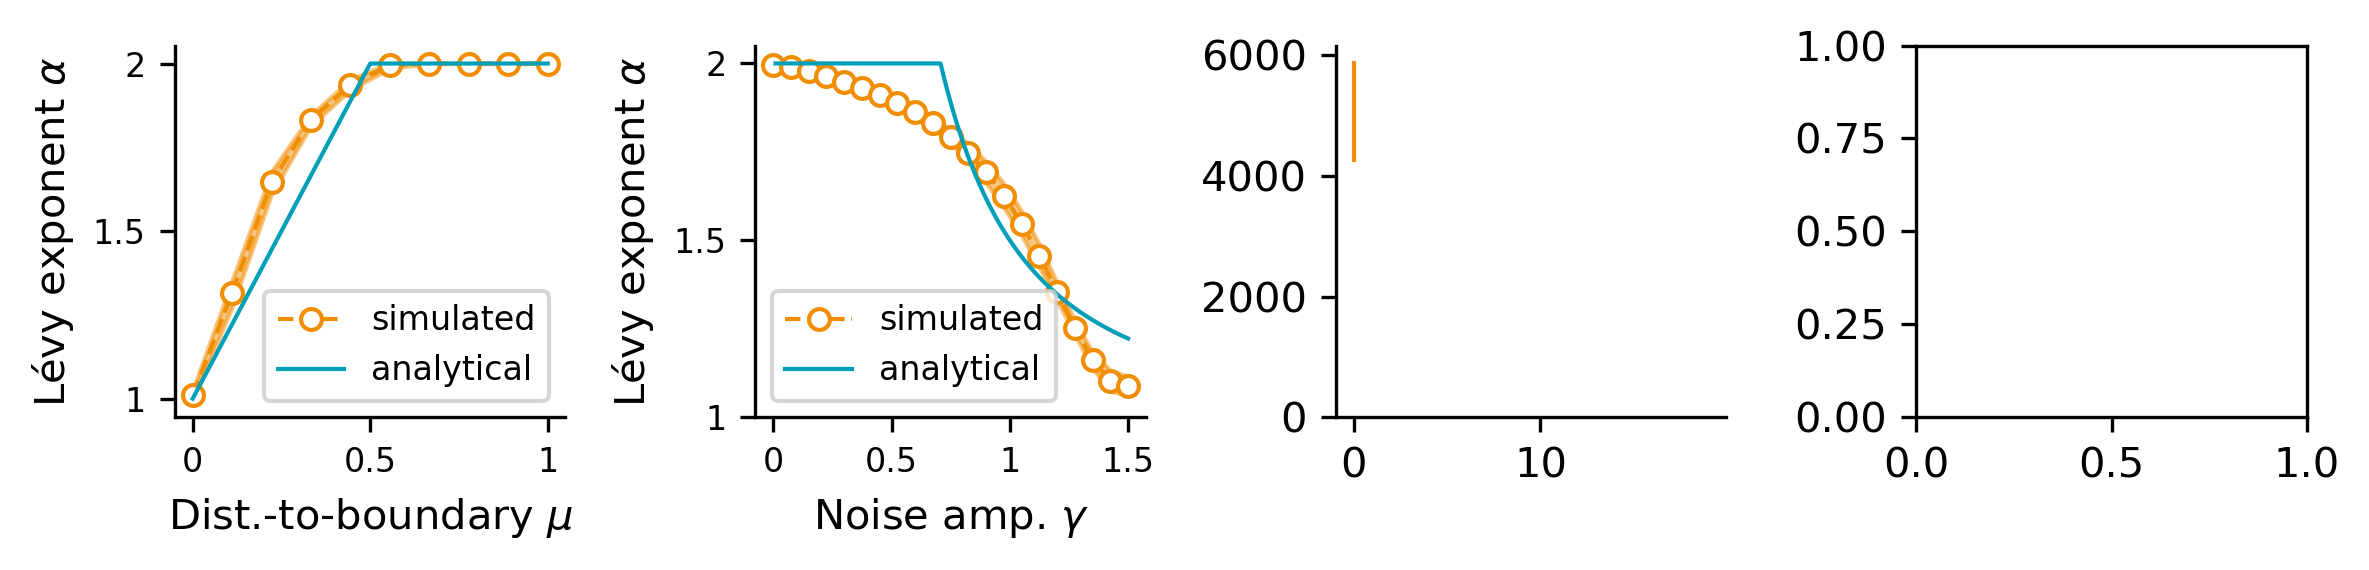

In [3]:
Alpha = np.load('../data/Alpha.npy')[:,1:,:]
#print(Alpha.shape)
Alpha_mean = np.mean(Alpha,axis = 2)
Alpha_std = np.std(Alpha, axis = 2)
#print(Alpha_std)


mu = np.linspace(0, 1, Alpha.shape[1])
mu_theory = np.linspace(0, 1, 1000)
mu_theory_ = np.minimum(2, 1 + 2 * mu_theory) # gamma = 1

gamma = np.linspace(0, 1.5, Alpha.shape[0])
gamma_theory = np.linspace(0.01, 1.5, 1000)
gamma_theory_ = np.minimum(2, 1 + 0.5 / np.square(gamma_theory)) # mu = 0.25

#init a figure with gridspec
fig = plt.figure(figsize=(8,2), dpi= 300)
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,1], height_ratios=[1])

#set font size
labelsize = 10
ticksize = 8
#color
custom_color1 = '#F18D00'
custom_color2 = '#009FB9'
#black color
custom_color3 =  '#008000'


###########
#subplot 1#
###########

#plot the phase diagram in the first subplot
ax1 = plt.subplot(gs[0])

ax1.plot(mu, Alpha_mean[9,:], 
         marker='o', markersize=5, markerfacecolor='white', 
         linestyle='--', linewidth = 1,
         color=custom_color1, label = 'simulated')
ax1.fill_between(mu, Alpha_mean[9,:] - Alpha_std[9,:], Alpha_mean[9,:] + Alpha_std[9,:],
                 color= custom_color1, alpha=0.5)

ax1.plot(mu_theory, mu_theory_,  
         linestyle='-', linewidth=1,
         color=custom_color2, label = 'analytical')

#label
ax1.set_ylabel(r'Lévy exponent $\alpha$', fontsize=labelsize)
ax1.set_xlabel(r'Dist.-to-boundary $\mu$', fontsize=labelsize)
#ticks
ax1.set_xticks(np.array([0, 0.5, 1]))
ax1.set_yticks(np.asarray([1,1.5,2]))
ax1.set_xticklabels([0,0.5,1],fontsize = ticksize)
ax1.set_yticklabels([1,1.5,2],fontsize = ticksize)
#legend
ax1.legend(fontsize=ticksize)
#remove right and up axiss
ax1.spines['right'].set_visible(False)   
ax1.spines['top'].set_visible(False)

###########
#subplot 2#
###########

#plot the phase diagram in the first subplot
ax2 = plt.subplot(gs[1])

#plt.errorbar(gamma, Alpha_mean[:,3],Alpha_std[:,3],fmt='o', markersize=3, markerfacecolor='white',linestyle = '-',color = 'k', label = 'simulated')
ax2.plot(gamma, Alpha_mean[:,3], 
         marker='o', markersize=5, markerfacecolor='white', 
         linestyle='--', linewidth=1, 
         color=custom_color1, label = 'simulated')
ax2.fill_between(gamma, Alpha_mean[:,3] - Alpha_std[:,3], Alpha_mean[:,3] + Alpha_std[:,3],
                 color=custom_color1, alpha=0.5)
ax2.plot(gamma_theory, gamma_theory_, 
         linestyle='-', linewidth=1, 
         color=custom_color2, label = 'analytical',)

#label
ax2.set_ylabel(r'Lévy exponent $\alpha$', fontsize=labelsize)
ax2.set_xlabel(r'Noise amp. $\gamma$', fontsize=labelsize)
#ticks
ax2.set_xticks(np.array([0, 0.5, 1, 1.5]))
ax2.set_yticks(np.asarray([1,1.5,2]))
ax2.set_xticklabels([0,0.5,1,1.5],fontsize = ticksize)
ax2.set_yticklabels([1,1.5,2],fontsize = ticksize)
#legend
ax2.legend(fontsize=ticksize)

#remove right and up axiss
ax2.spines['right'].set_visible(False)   
ax2.spines['top'].set_visible(False)   

###########
#subplot 3#
###########

#plot levy flight and brownian motion step size histogram
ax3 = plt.subplot(gs[2])

mu=2
gamma=15
#if './data/stepsize' + str(mu) + '_' + str(gamma) + '.npy' not exists, generate it
if not os.path.exists('../data/stepsize' + str(mu) + '_' + str(gamma) + '.npy'):
    center_trace = bm.as_numpy(TwoD_fun.get_trace(mu, gamma , 100, 0.2, 1, 100))
    stepsize = np.sum(np.square(center_trace[:-1, :] - center_trace[1:, :]), axis=1)
    stepsize = stepsize[199:]
    np.save('../data/stepsize' + str(mu) + '_' + str(gamma) + '.npy', stepsize)
else:
    stepsize = np.load('../data/stepsize' + str(mu) + '_' + str(gamma) + '.npy')

fit_guess = np.array([[2,0,0],[1,1,3]])

#plt.hist(stepsize, range(20),density=True, alpha = 0.5, color = fit_color[label],label = legend[label],edgecolor='w')
#hist
ax3.hist(stepsize, range(20), density=True, alpha=0.5, 
         color=custom_color1, edgecolor='w',
         label='Brownian-diffusion')
ans = levy.fit_levy(stepsize, alpha=fit_guess[1,0], beta=fit_guess[1,1], loc=fit_guess[1,2])  # alpha beta mu sigma
para = ans[0].get()
dist = stats.levy_stable
x = np.linspace(np.min(stepsize), np.max(stepsize), 100)
ax3.plot(x, dist.pdf(x, para[0], para[1], para[2], para[3]),
        linewidth=1, alpha=1, color=custom_color1)

#set upper and right axis invisible
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

###########
#subplot 4#
###########

#plot the phase diagram in the first subplot
ax4 = plt.subplot(gs[3])

plt.tight_layout()




sigma_m = 0.0006380833863259859 , m_0 =  0.9


Predict 10200 steps: : 100%|██████████| 10200/10200 [00:03<00:00, 3084.36it/s]


(array([6.86401157e+06, 2.72819800e+06, 1.15812082e+06, 5.05952418e+05,
        2.03077299e+05, 8.93539820e+04, 4.17758877e+04, 9.28353672e+03,
        1.16044132e+03, 3.48132397e+03]),
 array([6.84807766e-12, 8.61809468e-08, 1.72355044e-07, 2.58529127e-07,
        3.44703238e-07, 4.30877321e-07, 5.17051433e-07, 6.03225544e-07,
        6.89399599e-07, 7.75573710e-07, 8.61747822e-07]),
 <BarContainer object of 10 artists>)

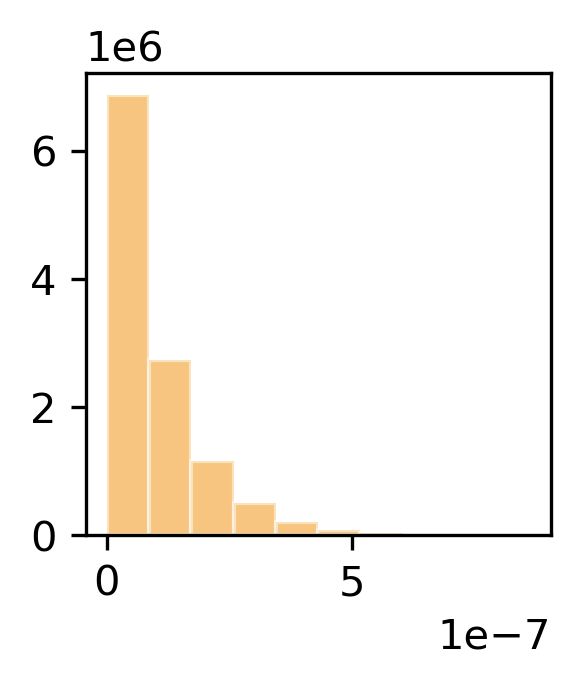

In [5]:
#mu=0.1; gamma=0.1
mu=2; gamma=15
#if './data/stepsize' + str(mu) + '_' + str(gamma) + '.npy' not exists, generate it
if not os.path.exists('./stepsize' + str(mu) + '_' + str(gamma) + '.npy'):
    center_trace = bm.as_numpy(TwoD_fun.get_trace(mu, gamma, 100, 0.2, 1, 100))
    stepsize = np.sum(np.square(center_trace[:-1, :] - center_trace[1:, :]), axis=1)
    stepsize = stepsize[199:]
    np.save('./stepsize' + str(mu) + '_' + str(gamma) + '.npy', stepsize)
else:
    stepsize = np.load('./stepsize' + str(mu) + '_' + str(gamma) + '.npy')
    
#hist of stepsize
plt.figure(figsize=(2,2), dpi= 300)
plt.hist(stepsize, density=True, alpha=0.5, color=custom_color1, edgecolor='w', label='Brownian-diffusion')

(array([4.85742662e+06, 1.85678518e+06, 7.20058839e+05, 3.15273287e+05,
        1.06939432e+05, 4.11914847e+04, 1.74271666e+04, 4.75286362e+03,
        7.92143937e+02, 7.92143937e+02]),
 array([5.44009282e-12, 1.26245126e-07, 2.52484824e-07, 3.78724508e-07,
        5.04964191e-07, 6.31203875e-07, 7.57443559e-07, 8.83683242e-07,
        1.00992293e-06, 1.13616261e-06, 1.26240229e-06]),
 <BarContainer object of 10 artists>)

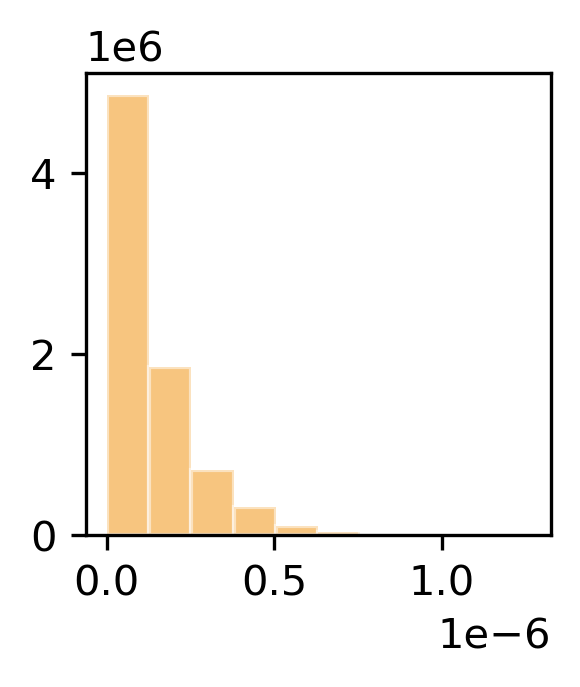

In [12]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Compute and plot a histogram.
    
    This method uses `numpy.histogram` to bin the data in *x* and count the
    number of values in each bin, then draws the distribution either as a
    `.BarContainer` or `.Polygon`. The *bins*, *range*, *density*, and
    *weights* parameters are forwarded to `numpy.histogram`.
    
    If the data has already been binned and counted, use `~.bar` or
    `~.stairs` to plot the distribution::
    
        counts, bins = np.histogram(x)
        plt.stairs(counts, bins)
    
    Alternatively, plot pre-computed bins and counts using ``hist()`` by
    treating each bin as a single point with a weight equal to its count::
    
        plt.hist(bins[:-1], bins, weights=coun